In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r"C:\Users\Obi Somto Naomi\Downloads\kc_house_data.csv.zip")

# Exploring the dataset

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.duplicated().sum()

0

In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
data['price'] = data['price'].astype(int)

# Checking for relationships with data visualization

<Axes: xlabel='price', ylabel='floors'>

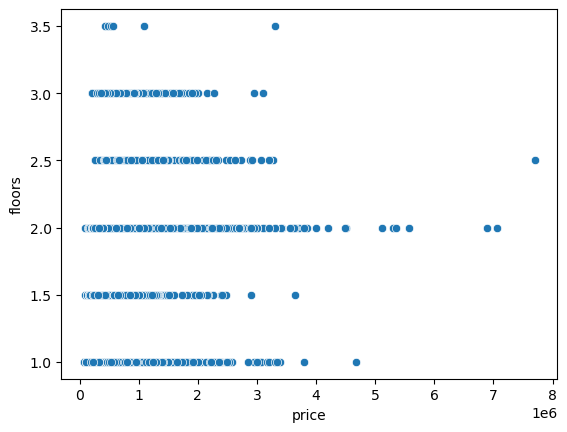

In [9]:
sns.scatterplot(x='price', y='floors', data=data)

<Axes: xlabel='price', ylabel='bedrooms'>

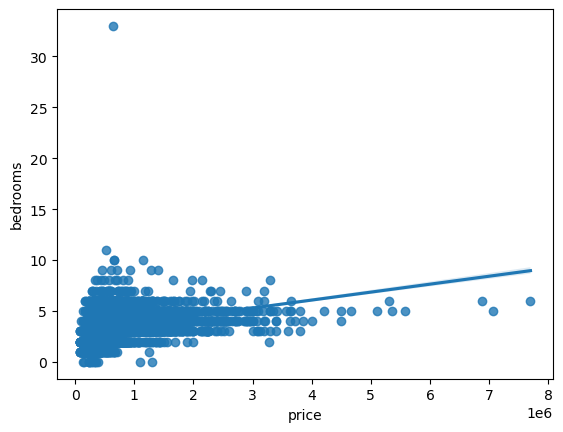

In [10]:
sns.regplot(x='price', y='bedrooms', data=data)

<Axes: xlabel='price', ylabel='sqft_living'>

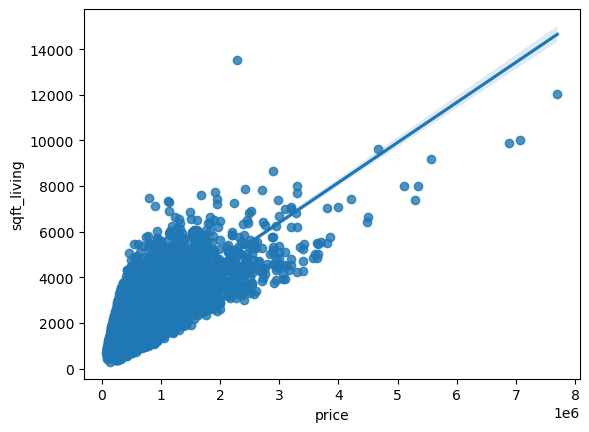

In [11]:
sns.regplot(x='price', y='sqft_living', data=data)

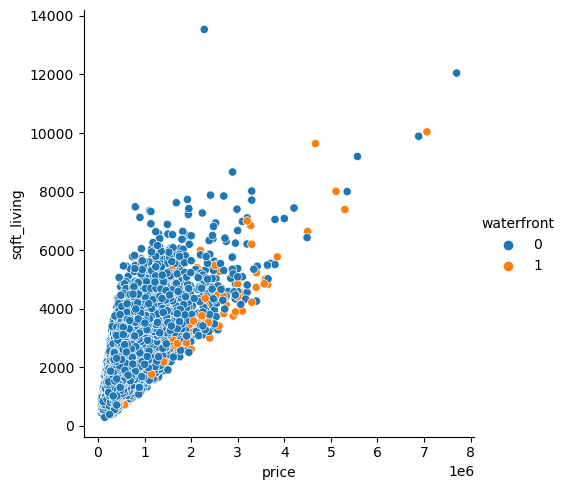

In [12]:
sns.relplot(x='price', y='sqft_living', hue='waterfront', data=data) 

In [13]:
#removing unnecessary columns

column = ['id', 'date']
subset = data.drop(columns=column, axis=1)

In [14]:
subset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

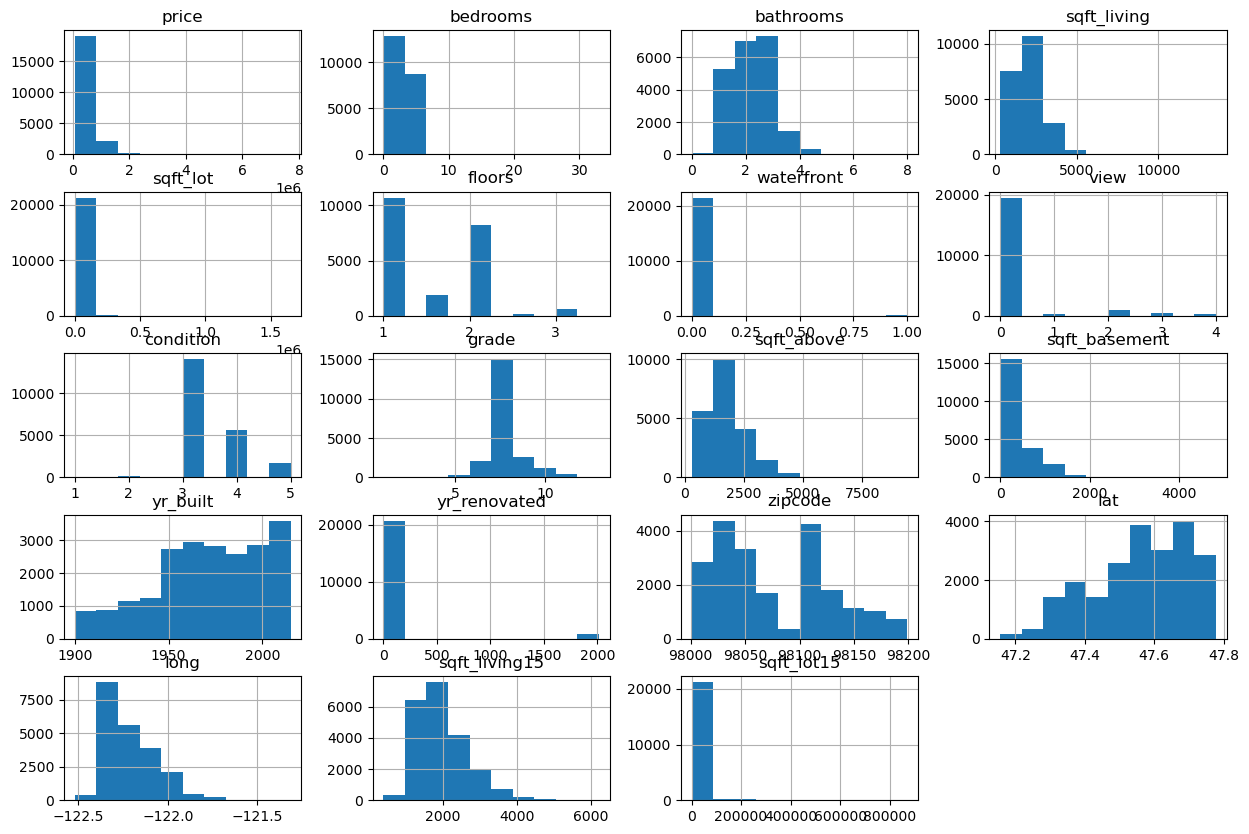

In [15]:
subset.hist(figsize=(15,10))

In [16]:
subset['bedrooms'] = np.log(subset['bedrooms']+1) #adding +1 to prevent 0 values 
subset['sqft_living'] = np.log(subset['sqft_living']+1)
subset['sqft_lot'] = np.log(subset['sqft_lot']+1)
subset['sqft_lot15'] = np.log(subset['sqft_lot15']+1)
subset['sqft_basement'] = np.log(subset['sqft_basement']+1)
subset['price'] = np.log(subset['price']+1)

<Axes: >

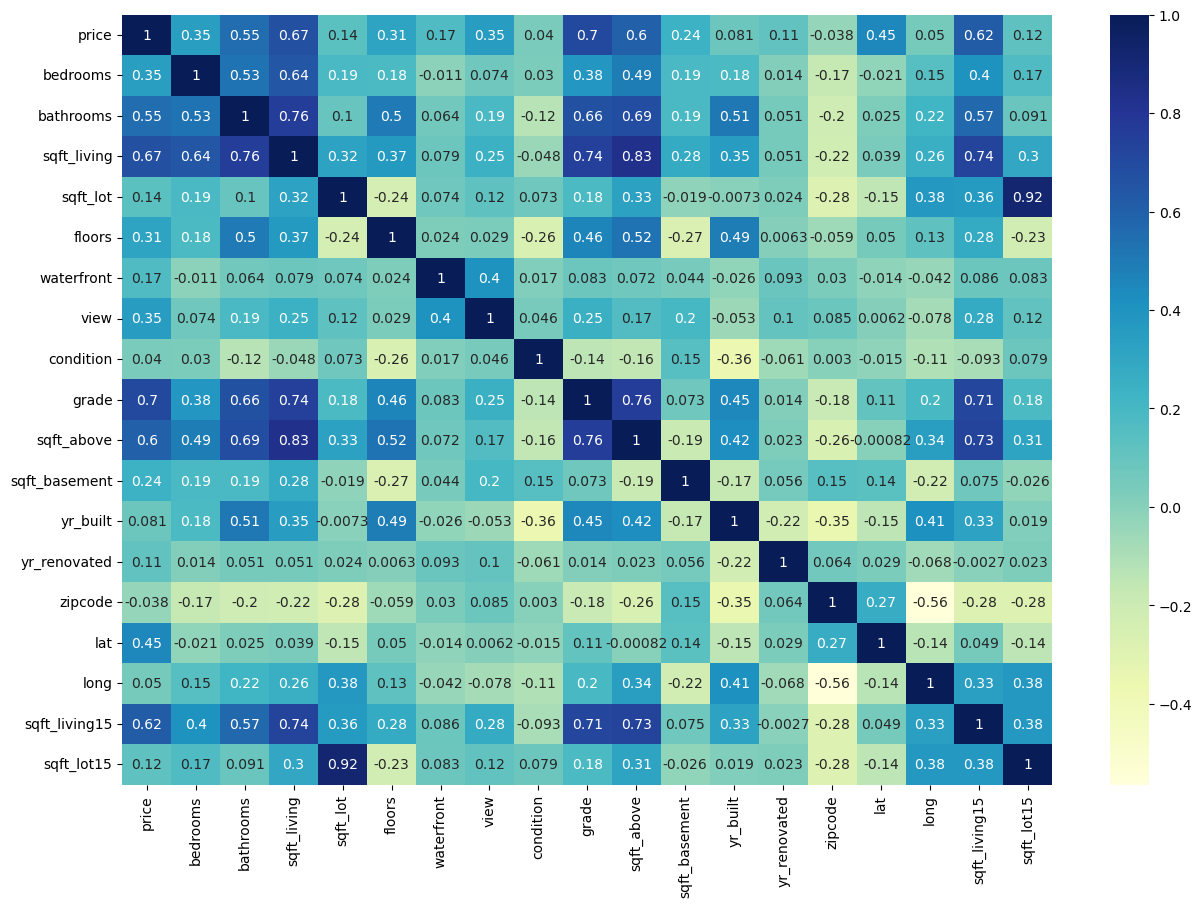

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(subset.corr(), annot=True, cmap='YlGnBu') 

In [18]:
from sklearn.model_selection import train_test_split

x = subset.drop('price', axis=1)
y = subset['price']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #using 30% of the data for testing

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
lr.score(x_test, y_test)

0.7724072134453982

In [23]:
pred = lr.predict(x_test)

In [24]:
print('Predicted Values:', pred[0:4])
print('Actual Values:', y_test[0:4].values)

Predicted Values: [13.75964204 13.08424863 13.15091687 13.20859242]
Actual Values: [13.48700788 12.94801237 13.42616631 12.96454163]


In [25]:
print('The R^2 for the training data:', lr.score(x_train, y_train))
print('The R^2 for the testing data:', lr.score(x_test, y_test))

The R^2 for the training data: 0.7757506704607411
The R^2 for the testing data: 0.7724072134453982


In [26]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.06276205866282253
